In [58]:
# Load all the libaries needed 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [59]:
# Import healthcare dataset 
from sklearn.datasets import load_breast_cancer 
# Load dataset 
dataset = load_breast_cancer(as_frame = True)

# Convert into a pandas dataframe
df = dataset.frame 

# Clean column names - remove extra spaces
df.columns = df.columns.str.strip()

# View the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [60]:
# Check the dataset's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [61]:
# Make the dataset's structure outcome readable 
df['diagnosis'] = df['target'].map({
    0: 'malignant',
    1: 'benign' 
})

df[['target','diagnosis']].head()

,target,diagnosis
0,0,malignant
1,0,malignant
2,0,malignant
3,0,malignant
4,0,malignant


In [62]:
# Introduce intentional missing to the data 
np.random.seed(42)

# Missingness based on tumour size 
condition = df['mean radius'] > df['mean radius'].median()

# Introduce missing values in multiple features
df.loc[condition,'mean texture'] = np.nan
df.loc[condition,'mean perimeter'] = np.nan

# Random missingness to simulate data entry gaps
random_idx = df.sample(frac=0.1).index 
df.loc[random_idx,'mean smoothness'] = np.nan

# Check the missing data 
# df.isnull().sum()

In [63]:
# Find the percentage of missing data 
missing_percentage = df.isnull().mean().sort_values(ascending = False)
missing_percentage

mean texture               0.499121
mean perimeter             0.499121
mean smoothness            0.100176
mean radius                0.000000
mean area                  0.000000
mean compactness           0.000000
mean concavity             0.000000
mean concave points        0.000000
mean symmetry              0.000000
mean fractal dimension     0.000000
radius error               0.000000
texture error              0.000000
perimeter error            0.000000
area error                 0.000000
smoothness error           0.000000
compactness error          0.000000
concavity error            0.000000
concave points error       0.000000
symmetry error             0.000000
fractal dimension error    0.000000
worst radius               0.000000
worst texture              0.000000
worst perimeter            0.000000
worst area                 0.000000
worst smoothness           0.000000
worst compactness          0.000000
worst concavity            0.000000
worst concave points       0

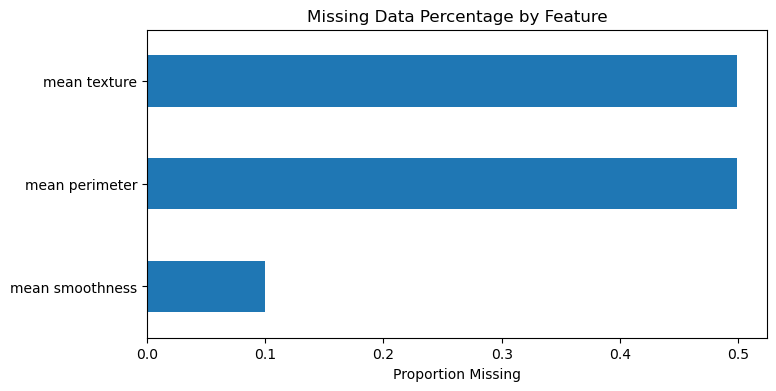

In [64]:
# Produce a bar plot of the missing data 
plt.figure(figsize=(8,4))
missing_percentage[missing_percentage > 0].plot(kind= 'barh')
plt.xlabel ('Proportion Missing')
plt.title ('Missing Data Percentage by Feature')
plt.gca().invert_yaxis()
plt.show()

In [65]:
# Create missing indicators for multiple columns 
missing_cols = ['mean texture', 'mean perimeter', 'mean smoothness']
for col in missing_cols:
    df[f'missing_{col}'] = df[col].isnull()

In [66]:
# Compare the outcomes for each missing feature 
for col in missing_cols: 
    print(f"\n0utcome mean for {col}:")
    print(df.groupby(f'missing_{col}')['target'].mean())


0utcome mean for mean texture:
missing_mean texture
False    0.940351
True     0.313380
Name: target, dtype: float64

0utcome mean for mean perimeter:
missing_mean perimeter
False    0.940351
True     0.313380
Name: target, dtype: float64

0utcome mean for mean smoothness:
missing_mean smoothness
False    0.619141
True     0.701754
Name: target, dtype: float64


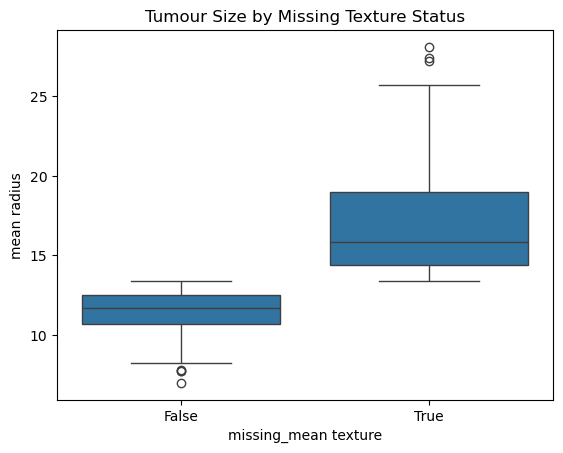

In [67]:
# Box plot showing outcome vs missingness
sns.boxplot(x='missing_mean texture', y='mean radius', data=df)
plt.title('Tumour Size by Missing Texture Status')
plt.show()

In [68]:
# Run a statistical test for each feature - T test
from scipy.stats import ttest_ind

for col in missing_cols:
    group_missing = df[df[f'missing_{col}']]['target']
    group_not_missing = df[~df[f'missing_{col}']]['target']
    
    stat, p_value = ttest_ind(
        group_missing, 
        group_not_missing, 
        nan_policy= 'omit',
        equal_var = False
    )

    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"{col}:p-value = {p_value:.4e} ({significance})")

mean texture:p-value = 3.4722e-64 (Significant)
mean perimeter:p-value = 3.4722e-64 (Significant)
mean smoothness:p-value = 2.0652e-01 (Not Significant)


In [69]:
# Running multiple tests for comparison 
from statsmodels.stats.multitest import multipletests 

p_values = []

for col in missing_cols:
    group_missing = df[df[f'missing_{col}']]['target']
    group_not_missing = df[~df[f'missing_{col}']]['target']

    stat, p = ttest_ind(
        group_missing, 
        group_not_missing, 
        nan_policy= 'omit',
        equal_var = False
    )
    p_values.append(p)

adjusted = multipletests(p_values, method = 'fdr_bh')
adjusted

(array([ True,  True, False]),
 array([5.20823785e-64, 5.20823785e-64, 2.06516298e-01]),
 np.float64(0.016952427508441503),
 0.016666666666666666)

In [70]:
# Organise the output in a table in a dataframe 
import pandas as pd
results_df = pd.DataFrame({
    'Feature': missing_cols,
    'Raw p-value': p_values,
    'Adjusted p-value': adjusted[1],
    'Significant (FDR)': adjusted[0]
})

# Format the values for readability
results_df['Raw p-value'] = results_df['Raw p-value'].apply(lambda x: f"{x:.2e}")
results_df['Adjusted p-value'] = results_df['Adjusted p-value'].apply(lambda x: f"{x:.2e}")
results_df['Significant (FDR)'] = results_df['Significant (FDR)'].map({True: 'Yes', False: 'No'})

# Display the table 
results_df

,Feature,Raw p-value,Adjusted p-value,Significant (FDR)
0,mean texture,3.47e-64,5.21e-64,Yes
1,mean perimeter,3.47e-64,5.21e-64,Yes
2,mean smoothness,2.07e-01,2.07e-01,No


In [71]:
# Save output
df.to_csv('processed_data.csv',index = False)